Our data set is very small and we are dealing with a lack of data. Each of our class values for crime rate could even be considered as minority classes, although all of them are equally important to our analysis. We will try to create synthetic data to increase the number of data points for our minority classes. The fake data should contain the same statistical properties as our real data. We will do this using SMOTE, which takes minority class data points and creates new data points that lie between any two nearest data points joined by a straight line 
(5 Ways to Deal with the Lack of Data in Machine Learning, n.d.)

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


In [2]:
Data = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/Crime_Data.csv')
Data = Data.drop('Unnamed: 0',axis = 1)
C_Rate_Int = []
for i in range(len(Data)):
    if (Data['C_Rate'][i] == 'Very Low'):
        C_Rate_Int.append(0)
    if (Data['C_Rate'][i] == 'Low'):
        C_Rate_Int.append(1)
    if (Data['C_Rate'][i] == 'Medium'):
        C_Rate_Int.append(2)
    if (Data['C_Rate'][i] == 'High'):
        C_Rate_Int.append(3)
    if (Data['C_Rate'][i] == 'Very High'):
        C_Rate_Int.append(4)
Data['C_Rate_Int'] = C_Rate_Int

In [3]:
Data_1 = Data.values

First we split the data into the independent features and the dependent variable

In [4]:
y = Data_1[:,-1]
X = np.delete(Data_1,[3,-1],axis = 1)

Now we label encode the target variable and summarise the distribution of our class values

In [5]:
y = LabelEncoder().fit_transform(y)

In [6]:
counter = Counter(y)
for k,v in counter.items():
    per = v/len(y)*100
    print('Class=%d, n=%d (%.3f%%)' % (k,v,per))

Class=0, n=112 (10.000%)
Class=3, n=280 (25.000%)
Class=2, n=336 (30.000%)
Class=1, n=280 (25.000%)
Class=4, n=112 (10.000%)


Now we plot the distribution of the classes

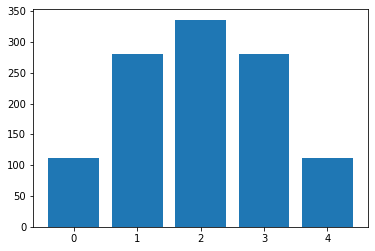

In [7]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we will apply SMOTE, which will over sample the different levels of Crime Rate to have the same number of examples as the the Crime Rate level withy the highest number of data points. In this case that would be the C_Rate level corresponding to the class value of 2.

In [8]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [9]:
counter = Counter(y)
for k,v in counter.items():
    per = v/len(y)*100
    print('Class=%d, n=%d (%.3f%%)' % (k,v,per))


Class=0, n=336 (20.000%)
Class=3, n=336 (20.000%)
Class=2, n=336 (20.000%)
Class=1, n=336 (20.000%)
Class=4, n=336 (20.000%)


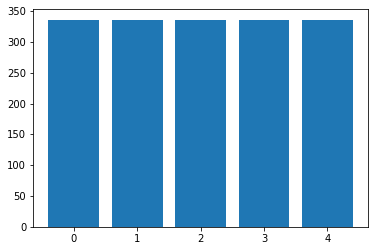

In [10]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [11]:
colnames = Data.columns.values
colnames

array(['Year', 'N_ID', 'Pop', 'C_Rate', 'Ad_Ed', 'Child_Care',
       'Com_House', 'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation',
       'Inflation', 'NIA', 'C_Rate_Int'], dtype=object)

In [12]:
X_names = ['Year', 'N_ID', 'Pop', 'Ad_Ed', 'Child_Care',
       'Com_House', 'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation',
       'Inflation', 'NIA']

In [13]:
SMOTE_data = pd.DataFrame(X, columns = X_names)
SMOTE_data

,Year,N_ID,Pop,Ad_Ed,Child_Care,Com_House,Emp_Res,Sub_Trt,Trans_House,Recreation,Inflation,NIA
0,2014.0,97.000000,11197.333377,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
1,2014.0,27.000000,25528.887749,0.000000,0.0,4.000000,1.000000,0.000000,0.0,0.000000,1.91,1.000000
2,2014.0,38.000000,14298.667753,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.91,0.000000
3,2014.0,31.000000,13508.443828,0.000000,0.0,48.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
4,2014.0,16.000000,22787.557567,0.000000,46.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2021.0,118.159559,722.835028,0.000000,0.0,45.168503,0.903370,0.000000,0.0,1.903370,3.40,0.000000
1676,2021.0,134.891923,912.146644,0.072051,0.0,33.277193,1.180129,0.000000,0.0,2.000000,3.40,0.963974
1677,2021.0,43.956174,959.158129,0.000000,0.0,12.379573,0.000000,0.094893,0.0,0.000000,3.40,0.000000
1678,2021.0,113.516430,1184.080185,0.000000,0.0,9.479216,0.000000,0.719913,0.0,0.719913,3.40,0.719913


In [14]:
SMOTE_data['C_Rate'] = y

In [15]:
SMOTE_data

,Year,N_ID,Pop,Ad_Ed,Child_Care,Com_House,Emp_Res,Sub_Trt,Trans_House,Recreation,Inflation,NIA,C_Rate
0,2014.0,97.000000,11197.333377,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,0
1,2014.0,27.000000,25528.887749,0.000000,0.0,4.000000,1.000000,0.000000,0.0,0.000000,1.91,1.000000,3
2,2014.0,38.000000,14298.667753,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.91,0.000000,0
3,2014.0,31.000000,13508.443828,0.000000,0.0,48.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,3
4,2014.0,16.000000,22787.557567,0.000000,46.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2021.0,118.159559,722.835028,0.000000,0.0,45.168503,0.903370,0.000000,0.0,1.903370,3.40,0.000000,4
1676,2021.0,134.891923,912.146644,0.072051,0.0,33.277193,1.180129,0.000000,0.0,2.000000,3.40,0.963974,4
1677,2021.0,43.956174,959.158129,0.000000,0.0,12.379573,0.000000,0.094893,0.0,0.000000,3.40,0.000000,4
1678,2021.0,113.516430,1184.080185,0.000000,0.0,9.479216,0.000000,0.719913,0.0,0.719913,3.40,0.719913,4


In [17]:
SMOTE_data.to_csv('//Users/alyzehjiwani/Downloads/Data/SMOTE_data.csv')

Now that we have our new dataset with our synthesised data we will rerun our models to see if there is any change in our model effectiveness.